In [29]:
# built-ins
from pathlib import Path

# third party import
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from skimage.feature import hog
from skimage import exposure
from skimage.feature import corner_harris, corner_subpix, corner_peaks

# custom import
from src.data.dataset import get_dataset, merge_datasets

In [2]:
datasets = []
for split in ['train', 'valid', 'test']:
    dataset_root = Path(f'data/{split}')
    annotation_fp = dataset_root / '_annotations.coco.json'
    dataset = get_dataset(dataset_root, annotation_fp)
    datasets.append(dataset)
combined_dataset = merge_datasets(datasets)

 100% |█████████████████| 360/360 [271.1ms elapsed, 0s remaining, 1.3K samples/s]    
 100% |█████████████████| 101/101 [95.1ms elapsed, 0s remaining, 1.1K samples/s]   
 100% |███████████████████| 51/51 [59.9ms elapsed, 0s remaining, 851.8 samples/s]  


In [44]:
sample_img_fp = combined_dataset.take(1).values('filepath')[0]
sample_img = Image.open(sample_img_fp)

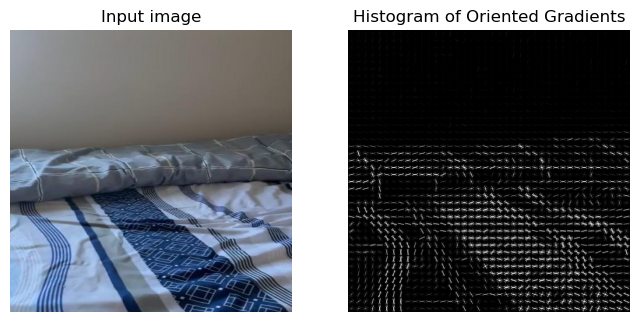

In [25]:
fd, hog_image = hog(
    sample_img,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1,
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(sample_img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

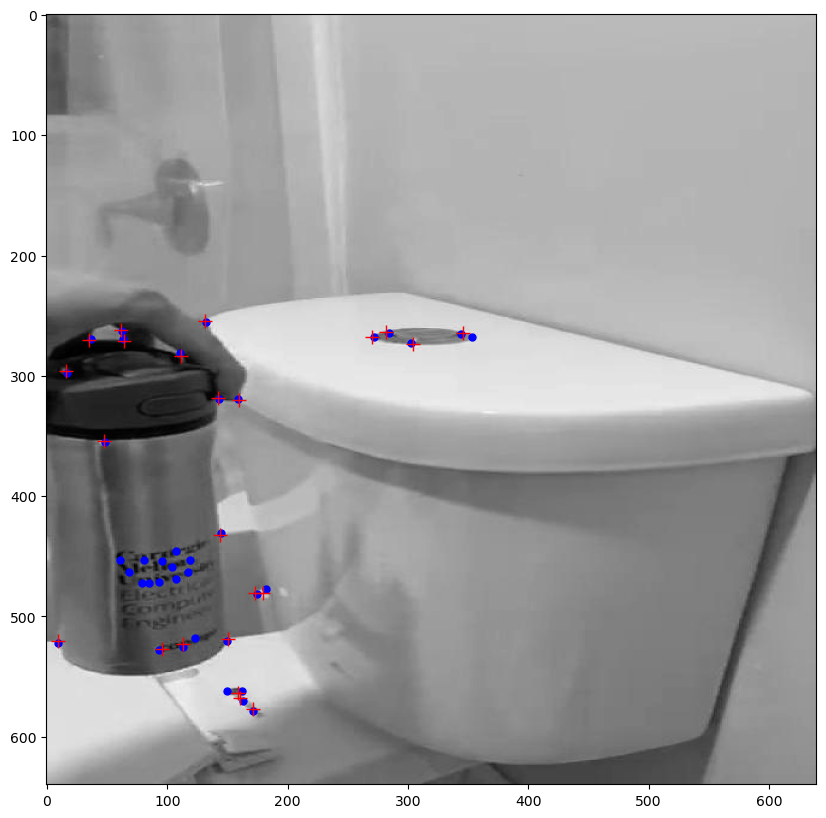

In [62]:
# convert img to grayscale
sample_img = cv2.imread(sample_img_fp)
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY)

coords = corner_peaks(corner_harris(sample_img), min_distance=5, threshold_rel=0.01)
coords_subpix = corner_subpix(sample_img, coords, window_size=13)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(sample_img, cmap=plt.cm.gray)
ax.plot(
    coords[:, 1], coords[:, 0], color='blue', marker='o', linestyle='None', markersize=5
)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=10)
plt.show()